In [1]:
import gtfparse 
from Bio import SeqIO
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly


fn = 'gencode.v28.basic.annotation.gtf'
df = gtfparse.parse_gtf(fn)
#1684537 total entries found using df.shape()


In [2]:
arr= df['attribute']
df2= pd.DataFrame()
# print("gene_name" in arr[1])
# arr[1].index("gene_name")

import time
start = time.time()
for i in range(0,200):
    array = arr[i].split("; ")
#     print(array)
    dictionary = {}
    for j in range(0,len(array)):
        temp = array[j].split(' ')
        dictionary[temp[0]] = temp[1].strip('"')
#         dictionary.update({ temp[0]:temp[1].strip('"')})
        #df_name[col name]= df_name[col name of dict].map(dit) for map but no common. attribute
    df2=df2.append(dictionary ,ignore_index=True)

print(time.time() - start)
    
#print df2[:50]

0.746246099472


In [6]:
arr= df['attribute']
df2= pd.DataFrame()
# print("gene_name" in arr[1])
# arr[1].index("gene_name")
import re
import time
from collections import deque
start = time.time()
dictionary = {}

temp=["gene_id",
 "gene_name",
 "gene_type",
 "havana_gene",
 "level",
 "havana_transcript",
 "tag",
 "transcript_id",
 "transcript_name",
 "transcript_support_level",
 "transcript_type",
 "exon_id",
 "exon_number",
 "ont",
 "protein_id",
 "ccdsid"]

for each in temp:
    dictionary[each] = deque()

for i in xrange(0,len(arr)):
    if i % 10000 == 0:
        print(i)
    array = re.split(";\s|\s", arr[i])
    temp1 = list(temp)
    temp1.remove('tag')
    temp1.remove('ont')
    tag_list = deque()
    ont_list = deque()
    for i in xrange(0, len(array), 2):
        
        if array[i] not in temp1:
            pass
        else:
            temp1.remove(array[i])
        
        if array[i] == 'tag':
            tag_list.append(array[i+1].strip('"'))
            continue
        
        if array[i] == 'ont':
            ont_list.append(array[i+1].strip('"'))
            continue
            
        dictionary[array[i]].append(array[i+1].strip('"'))
    dictionary['tag'].append(tag_list)
    dictionary['ont'].append(ont_list)
    
    for each in temp1:
        dictionary[each].append(None)
            
print(time.time() - start)
# print(len(temp), len(temp1))
# print(dictionary)
for key, value in dictionary.iteritems():
    print(key, len(value))
# print(len(dictionary['gene_id']))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [7]:
from time import time
dictionary.pop("ont", None)
dictionary.pop("tag", None)
start = time()
df2 = pd.DataFrame.from_dict(dictionary)
print(time()-start)

10.4762568474


In [8]:
start = time()
df = df.drop(["attribute"],1) 
df=pd.concat([df,df2],axis=1)
time()-start

0.7712349891662598

In [9]:
df[:10]

,seqname,source,feature,start,end,score,strand,frame,ccdsid,exon_id,...,gene_name,gene_type,havana_gene,havana_transcript,level,protein_id,transcript_id,transcript_name,transcript_support_level,transcript_type
0,chr1,HAVANA,gene,11869,14409,NaN,+,0,None,None,...,DDX11L1,transcribed_unprocessed_pseudogene,"OTTHUMG00000000961.2"";",None,2,None,None,None,None,None
1,chr1,HAVANA,transcript,11869,14409,NaN,+,0,None,None,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000362751.1"";",2,None,ENST00000456328.2,RP11-34P13.1-002,1,processed_transcript
2,chr1,HAVANA,exon,11869,12227,NaN,+,0,None,ENSE00002234944.1,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000362751.1"";",2,None,ENST00000456328.2,RP11-34P13.1-002,1,processed_transcript
3,chr1,HAVANA,exon,12613,12721,NaN,+,0,None,ENSE00003582793.1,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000362751.1"";",2,None,ENST00000456328.2,RP11-34P13.1-002,1,processed_transcript
4,chr1,HAVANA,exon,13221,14409,NaN,+,0,None,ENSE00002312635.1,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000362751.1"";",2,None,ENST00000456328.2,RP11-34P13.1-002,1,processed_transcript
5,chr1,HAVANA,transcript,12010,13670,NaN,+,0,None,None,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000002844.2"";",2,None,ENST00000450305.2,RP11-34P13.1-001,NA,transcribed_unprocessed_pseudogene
6,chr1,HAVANA,exon,12010,12057,NaN,+,0,None,ENSE00001948541.1,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000002844.2"";",2,None,ENST00000450305.2,RP11-34P13.1-001,NA,transcribed_unprocessed_pseudogene
7,chr1,HAVANA,exon,12179,12227,NaN,+,0,None,ENSE00001671638.2,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000002844.2"";",2,None,ENST00000450305.2,RP11-34P13.1-001,NA,transcribed_unprocessed_pseudogene
8,chr1,HAVANA,exon,12613,12697,NaN,+,0,None,ENSE00001758273.2,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000002844.2"";",2,None,ENST00000450305.2,RP11-34P13.1-001,NA,transcribed_unprocessed_pseudogene
9,chr1,HAVANA,exon,12975,13052,NaN,+,0,None,ENSE00001799933.2,...,DDX11L1,transcribed_unprocessed_pseudogene,OTTHUMG00000000961.2,"OTTHUMT00000002844.2"";",2,None,ENST00000450305.2,RP11-34P13.1-001,NA,transcribed_unprocessed_pseudogene


In [10]:
#arr= df['attribute']
df2= pd.DataFrame()
# print("gene_name" in arr[1])
# arr[1].index("gene_name")
import re



arr = arr[:200].str.split(r"; | ")
# print(arr)
for each in arr:
    print(each)
    break

# import time
# start = time.time()
temp=['gene_id',
 'gene_name',
 'gene_type',
 'havana_gene',
 'level',
 'havana_transcript',
 'tag',
 'transcript_id',
 'transcript_name',
 'transcript_support_level',
 'transcript_type',
 'exon_id',
 'exon_number',
 'ont',
 'protein_id',
 'ccdsid']
df3 = pd.DataFrame(columns=temp)

#print(df3)
# for i in range(0,2000):
#     array = arr[i].split("; ")
# #     print(array)
#     dictionary = {}
#     for j in range(0,len(array)):
#         temp = array[j].split(' ')
#         dictionary[temp[0]] = temp[1].strip('"')
# #         dictionary.update({ temp[0]:temp[1].strip('"')})
#         #df_name[col name]= df_name[col name of dict].map(dit) for map but no common. attribute
#     df2=df2.append(dictionary ,ignore_index=True)

# print(time.time() - start)



['gene_id', '"ENSG00000223972.5"', 'gene_type', '"transcribed_unprocessed_pseudogene"', 'gene_name', '"DDX11L1"', 'level', '2', 'havana_gene', '"OTTHUMG00000000961.2";']


In [11]:
frame1 =  pd.concat([df[:200],df2[:200]],axis=1)
headers = frame1.dtypes.index

#gene1 = frame1.loc[frame1['gene_id']=="ENSG00000223972.5"]


In [22]:
frame1=df[:300]
#frame1.drop(["attribute"],1) 
# df2.shape
#list(df.columns)

In [13]:
#gene.drop(["attribute"],1)  

#we have gene1 for all entires in the gtf corresponding to the Gene ENSG00000223972.5



"""geneloc = gene1.loc[gene1['feature']=="gene"]
transcripts = gene1.loc[gene1['feature']=="transcript"]
t_location = list(transcripts.index)
transcripts = transcripts.loc[transcripts['transcript_type']=="processed_transcript"]
t_toprocess= list(transcripts.index)
"""
#print t_location , type(t_toprocess)

#locs=[]

"""print t_toprocess,t_location
frame = areas_in_transcript(t_toprocess,t_location)
print frame"""

'print t_toprocess,t_location\nframe = areas_in_transcript(t_toprocess,t_location)\nprint frame'

In [14]:
def GC_Content(start,stop,strand):
    try:
        f = open('chr1.txt',"r")
        f.seek(start)
        seq = f.read(stop-start) 
        #print stop-start,seq

        if strand == "+":
            G = seq.count("G")
            C = seq.count("C")
            A = seq.count("A")
            T = seq.count("T")
            return float(G+C)/float(A+T+G+C),float(A+T)/float(G+C)
        else :
            seq_dict = {'A':'T','T':'A','G':'C','C':'G'}
            seq = "".join([seq_dict[base] for base in reversed(seq)])
            G = seq.count("G")
            C = seq.count("C")
            A = seq.count("A")
            T = seq.count("T")
            return float(G+C)/float(A+T+G+C),float(A+T)/float(G+C)
    except KeyError as err:
        print("Sequence stretch contains N".format(err))
        return "N error"
    except ZeroDivisionError as err:
        print(str(stop-start)+'is the string length'.format(err))
        return "String length"+str(stop-start)
        raise
        
cols = ['GC:AT Ratio','GC%','feature']
def visualise(df):
    vals = pd.DataFrame(columns=cols)
    for i, row in df.iterrows():
    #df.shape()):
    #print df.loc[i]['start'],df.loc[i]['end'],df.loc[i]['strand']
        ans=GC_Content(df.loc[i]['start'],df.loc[i]['end'],df.loc[i]['strand'])
        if type(ans)== "string":
            d=pd.Series(["uncallable type is string",""], index=cols)
            #print type(d)
        else:
            #chnage ratio into ratio from decimal
            
            d=pd.Series([ans[0],ans[1], df.loc[i]['feature']], index=cols)
            d.name=i
            vals = vals.append(d)
            #i+=i
    return vals

def viz(frame):
    matplotlib.style.use('ggplot')
    colors = ["#5DADE2","#5499C7","#85C1E9"]
    gc = visualise(frame)
    #print gc
    ax = gc['GC%'].plot.bar(x='Display feature name here',y='GC%')
    ax.set_xticklabels(gc['feature'], rotation=0) 
    print gc ,plt.show()

def areas_in_transcript(t_toprocess,i,gene,locs):
    t_toprocess[i]
    locs = np.arange(t_toprocess[i],t_toprocess[i+1])
    print locs
    

 

   GC:AT Ratio       GC%     feature
1     0.574803  0.739726  transcript
2     0.511173  0.956284        exon
3     0.583333  0.714286        exon
4     0.562290  0.778443        exon

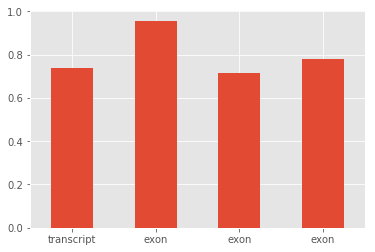

 None
    GC:AT Ratio       GC%     feature
5      0.590964  0.692151  transcript
6      0.595745  0.678571        exon
7      0.479167  1.086957        exon
8      0.583333  0.714286        exon
9      0.597403  0.673913        exon
10     0.588235  0.700000        exon

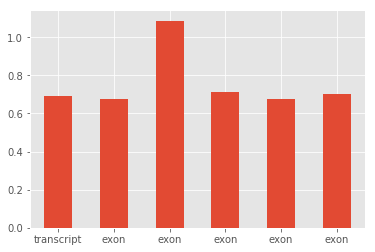

 None
    GC:AT Ratio       GC%     feature
13     0.544376  0.836967  transcript
14     0.666667  0.500000        exon
15     0.614379  0.627660        exon
16     0.571429  0.750000        exon
17     0.678082  0.474747        exon
18     0.580882  0.721519        exon
19     0.540741  0.849315        exon
20     0.598985  0.669492        exon
21     0.677215  0.476636        exon
22     0.629139  0.589474        exon
23     0.575758  0.736842        exon

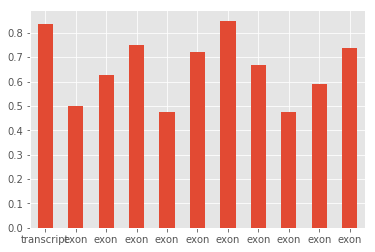

 None
    GC:AT Ratio       GC%     feature
26      0.61194  0.634146  transcript

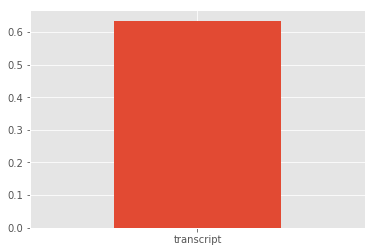

 None
    GC:AT Ratio       GC%     feature
29     0.489955  1.041005  transcript
30     0.602062  0.660959        exon
31     0.563107  0.775862        exon
32     0.545455  0.833333        exon

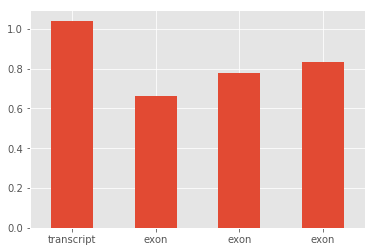

 None
    GC:AT Ratio       GC%     feature
33     0.457245  1.187013  transcript
34     0.452500  1.209945        exon

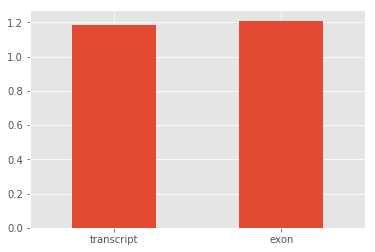

 None


In [24]:
traverse = df.gene_id.unique()
#print traverse


for i in range (0,4):
    gene = frame1.loc[frame1['gene_id']==traverse[i]]
    locs=[]
    t_location=[]
    t_toprocess=[]
    geneloc = gene.loc[gene['feature']=="gene"]
    transcripts = gene.loc[(gene['feature'] == "transcript")]
    #|(gene['feature'] == "gene")
    #print transcripts
    for j in range(0,len(transcripts)):
        
        t=[int(gene.index[-1])]
        t_location = list(transcripts.index)
        t_location= t_location+t
        #transcripts = transcripts.loc[transcripts['transcript_type']=="processed_transcript"]
        t_toprocess= [t_location[j],t_location[j+1]]
        pos= np.arange(t_location[j],t_location[j+1])
        frame = frame1.loc[pos]
        viz(frame)
    


In [16]:
geneloc = df.loc[df['feature']=="gene"]
print len(geneloc)
#geneloc = parse_attribute(geneloc,500)
#geneloc

58381


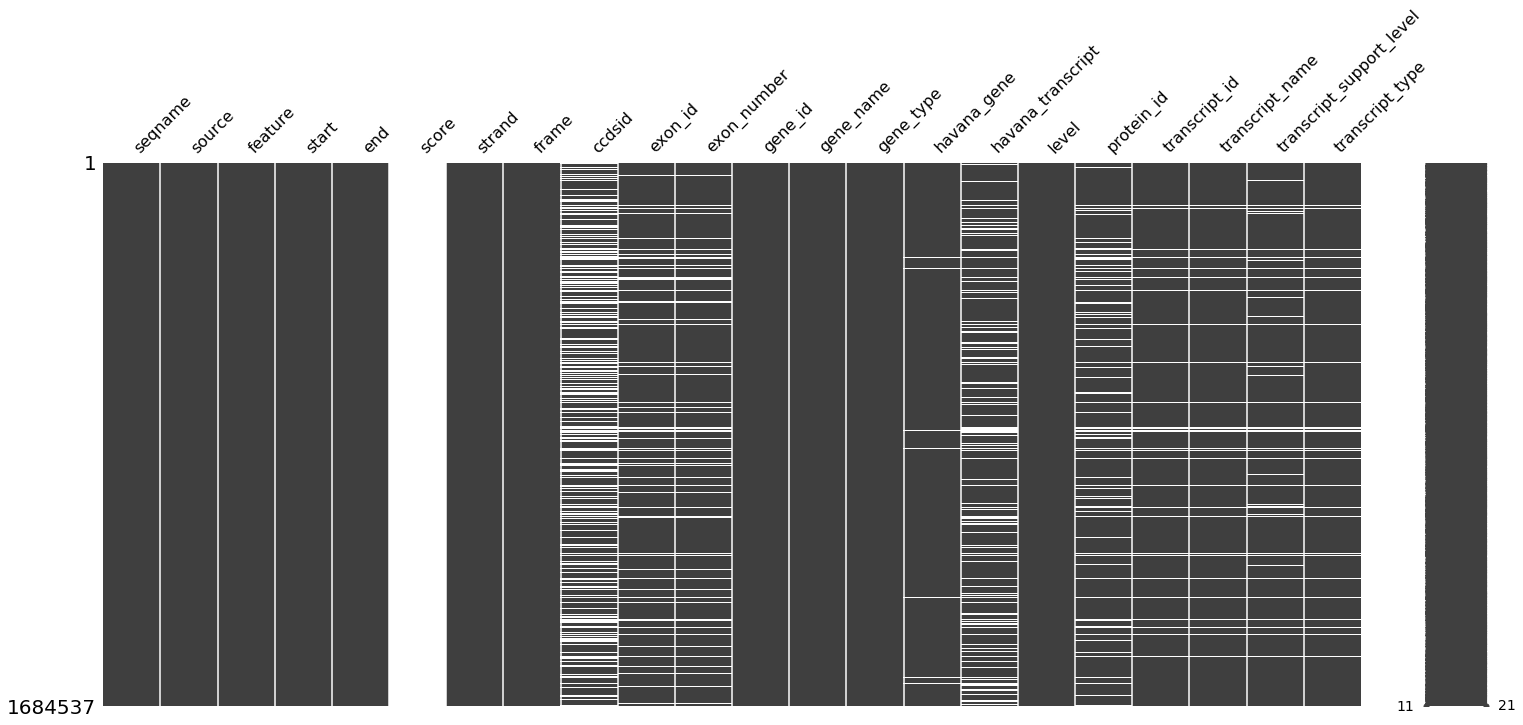

In [12]:
import missingno as mn

mn.matrix(df)
plt.show()